### operations of one store 



In [86]:
#import packages
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
import datetime as dt

from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error

In [3]:
# Import customer list
u_df=pd.read_csv('./data/Users_sanitized.csv', sep=',', index_col='UserId')
u_df.head()

,Unnamed: 0,CreationTimestamp,ClaimType,IsOfflineUser
UserId,,,,
eecc280c-9941-41bc-b26f-d519da794a5d,0,1970-01-01 00:00:00+00,consumer,False
d9d8a373-29f0-4fe5-8f17-39669083ac48,1,1970-01-01 00:00:00+00,consumer,True
8f27c773-334a-4f8c-82c2-8cdec215a9bb,2,1970-01-01 00:00:00+00,consumer,True
aefe87c8-f537-4bdc-954f-6833a047081b,3,1970-01-01 00:00:00+00,consumer,True
6ad98c4e-18e3-4a6e-ac94-1338cb239c2d,4,1970-01-01 00:00:00+00,consumer,True


In [4]:
set(list(u_df['ClaimType']))

{'admin',
 'catering_consumer',
 'consumer',
 'imc',
 'imsmc',
 'storeappuser',
 'superAdmin'}

In [5]:
# Import merchants
m_df=pd.read_csv('./data/MerchantInfos.csv', sep=',', index_col='Id')
m_df.head()

,MerchantId,Name,Longitude,Latitude,CreationDate,CategoryId,SellsOfflineCards,StreetAddress,ZipCode,City,Country,CanGetBowl,CanPreorder,IsPublished,ShowInStats
Id,,,,,,,,,,,,,,,
83787f7a-b659-44b6-a8aa-d1ef5b958a65,ed2c2eea-8399-4779-a9ea-dafb77878965,SAP WDF49 - Food Factory,8.642271,49.292543,2021-06-28 11:56:10.812661,4,False,Dietmar-Hopp-Allee 17,69190,Walldorf,NaN,True,False,True,True
4cd61f39-ddce-449f-8d1a-ef95c7b25307,cc8b8b51-efd7-4d74-84c8-4721619867df,Guten Dag,13.413539,52.548254,2020-07-14 19:44:49.101383,2,False,Schönhauser Allee 120,10437,Berlin,DE,False,True,True,True
fa17e91f-cdfb-4912-81c9-92cd0b87328e,78ecc5a3-0ea0-4820-9fd2-637c95d73782,Gasthaus Brückenschänke,7.771990,49.943655,2021-01-20 10:25:12.831661,2,False,Staatsstraße 4,55442,Stromberg,NaN,True,False,True,True
7c376406-7a5b-4a6c-b22c-e7e02ae0080c,f9b37c73-3a67-47b3-82cd-cfd1d6fafd6a,Com A,13.422482,52.500293,2020-08-26 06:53:57.107271,2,False,Oranienstraße 191,10999,Berlin,NaN,True,False,True,True
f421a5f6-ba67-4336-afc3-021a04da5005,556becfc-1aac-43e2-87d9-cbc3fab0f4b0,BLE - Betriebsgastronomie,7.184823,50.672743,2020-10-01 09:33:59.032472,4,False,Deichmanns Aue 29,53179,Bonn,NaN,True,False,False,True


In [7]:
u_df.loc[selected_user,]

Unnamed: 0                                0
CreationTimestamp    1970-01-01 00:00:00+00
ClaimType                          consumer
IsOfflineUser                         False
Name: eecc280c-9941-41bc-b26f-d519da794a5d, dtype: object

In [217]:
# import check-outs
out_df=pd.read_csv('./data/Total Checkout.csv', sep=',', low_memory=False)
out_df['OwnerSince']= pd.to_datetime(out_df['OwnerSince']).dt.tz_convert(tz='Europe/Berlin')
out_df['OwnerTill']= pd.to_datetime(out_df['OwnerTill']).dt.tz_convert(tz='Europe/Berlin')

out_df=out_df.drop(['Unnamed: 0'], axis=1)
out_df.shape

(1695250, 11)

In [218]:
out_df=out_df[out_df['UserId'].isin(u_df[u_df['ClaimType']=='consumer'].index) | out_df['UserId'].isin(u_df[u_df['ClaimType']=='catering_consumer'].index)  ]
out_df.shape

(1695079, 11)

In [244]:
out_df.head()

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,DeliveryTokenId,ContainerType
0,db70348b-76ae-4bff-b3ef-c1c727cc3be7,vytal_yjCP6j0bbUVAu0,e6e6d4e5-56dd-4361-8ebd-ebdd865f41ea,Mashery Hummus Kitchen,63672,NaN,2020-09-01 20:25:20.296746+02:00,2020-09-01 20:25:20.296746+02:00,4a9a935d-2260-4cfb-9bad-9751e48291a0,NaN,1250ml Bowl
1,66c1e632-a6d1-4203-bc6a-2b4c8e669e92,vytal_OwGu7ZOXba3jbu,e78d649c-7ced-4e07-95d0-8a25c58e1bc9,Krua Thai (Belgisches Viertel),63666,NaN,2020-09-01 20:14:25.942667+02:00,2020-09-01 20:14:25.942667+02:00,7f161610-c775-406f-a67c-95d322b463f6,NaN,1250ml Bowl
2,66c1e632-a6d1-4203-bc6a-2b4c8e669e92,vytal_OwGu7ZOXba3jbu,e78d649c-7ced-4e07-95d0-8a25c58e1bc9,Krua Thai (Belgisches Viertel),63664,NaN,2020-09-01 20:14:25.285038+02:00,2020-09-01 20:14:25.285038+02:00,68ea4bb3-0465-4209-a4cd-e6c03b394f7f,NaN,500ml Bowl
3,c525dce1-af31-4628-b4e9-c73901bf12d6,vytal_dpJU8pmvYzdV5e,c0a21089-3449-4744-b080-a8c7055718e2,Saigonese Kitchen,63657,NaN,2020-09-01 20:13:51.972676+02:00,2020-09-01 20:13:51.972676+02:00,eff44578-fe90-4045-ad49-6efc42c72a6e,NaN,750ml Bowl
4,c525dce1-af31-4628-b4e9-c73901bf12d6,vytal_dpJU8pmvYzdV5e,c0a21089-3449-4744-b080-a8c7055718e2,Saigonese Kitchen,63659,NaN,2020-09-01 20:13:51.972676+02:00,2020-09-01 20:13:51.972676+02:00,fa898324-f79e-42b2-86ef-4323d74e80c6,NaN,750ml Bowl


In [219]:
#select a user to be analyzed
selected_user=list(out_df.groupby(by='UserId').size().sort_values(ascending=False).head(200).tail(1).index)[0]

In [220]:
user_out=out_df[out_df['UserId']==selected_user].copy()
#del out_df

user_out.head(2)


,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,DeliveryTokenId,ContainerType
23733,1f71adf4-b35c-4418-b003-98f45fb2faf0,vytal_E17dFCSKEaCKzI,2470883c-e064-43a6-8844-1f8be7b2ff81,"Generali Sachsenring, Köln",795280,5e72fd43-867f-491e-9d73-012f28fb38d0,2021-01-28 12:57:29.855943+01:00,2021-02-01 11:52:06.777903+01:00,63ffe7f7-bfe3-49fe-bd9c-6c49717904be,NaN,1250ml Bowl
35964,1f71adf4-b35c-4418-b003-98f45fb2faf0,vytal_E17dFCSKEaCKzI,2470883c-e064-43a6-8844-1f8be7b2ff81,"Generali Sachsenring, Köln",782936,6da9f41f-7149-4354-9da1-3413d11cd65a,2021-01-27 12:35:27.039869+01:00,2021-01-28 12:11:19.304824+01:00,0c8b07bf-1826-4633-b881-f9da5a5c1c07,NaN,1250ml Bowl


In [221]:
##### import transactions
in_df=pd.read_csv('./data/Total Checkins.csv', sep=',', low_memory=False)

#in_df.info()

in_df['OwnerSince']= pd.to_datetime(in_df['OwnerSince']).dt.tz_convert(tz='Europe/Berlin')
in_df['OwnerTill']= pd.to_datetime(in_df['OwnerTill']).dt.tz_convert(tz='Europe/Berlin')

#print(in_df.info())
in_df=in_df.drop(['Unnamed: 0'], axis=1)


In [222]:
user_in=in_df[in_df['UserId']==selected_user].copy()
#del in_df
user_in.head(2)

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,ContainerType
29052,1f71adf4-b35c-4418-b003-98f45fb2faf0,vytal_E17dFCSKEaCKzI,2470883c-e064-43a6-8844-1f8be7b2ff81,"Generali Sachsenring, Köln",3802528,da3b8069-fb33-42e3-acab-32dcc5be845c,2021-08-31 12:18:43.029634+02:00,2021-09-01 12:47:12.185859+02:00,3e074778-9e67-4f07-85c8-2d5b368ace96,Compartment Bowl
39082,1f71adf4-b35c-4418-b003-98f45fb2faf0,vytal_E17dFCSKEaCKzI,2470883c-e064-43a6-8844-1f8be7b2ff81,"Generali Sachsenring, Köln",3785742,d9ff2c51-8371-414e-a583-76a4218e19d6,2021-08-30 12:15:22.753880+02:00,2021-08-31 12:15:45.129581+02:00,78d2c8c3-e8bd-42cb-b283-86ed443cc550,Compartment Bowl


## Time with the customer.


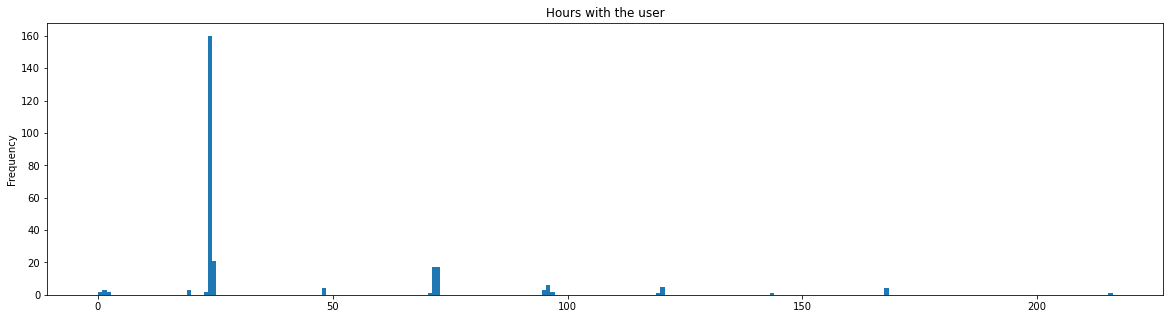

In [223]:
# plt how long containers stay in with the consumer 
# Consumer return's behaviour is particular. 
plt.figure(figsize=(20,5))
plt.title('Hours with the user')
plt.ylabel('Frequency')

plt.hist((user_in['OwnerTill']-user_in['OwnerSince']).dt.total_seconds()/3600, bins=240) # convert to hours
plt.show()

<AxesSubplot:>

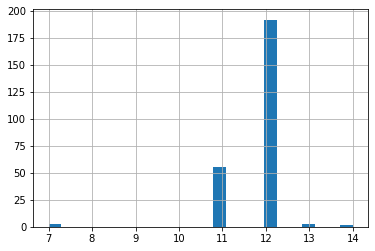

In [224]:
# plt shows times of returns in a day 

user_in['OwnerTill'].dt.hour.hist(bins=24)

<AxesSubplot:>

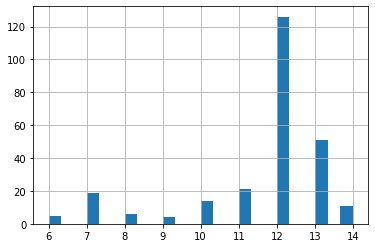

In [225]:
# plt shows times of check-outs in a day 

user_out['OwnerSince'].dt.hour.hist(bins=24)

<AxesSubplot:>

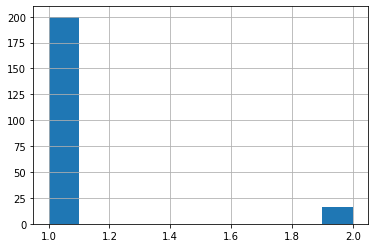

In [226]:
#number of containers that he/she ordered in a single transaction
user_out.groupby(by='TransactionId').size().hist()

<AxesSubplot:>

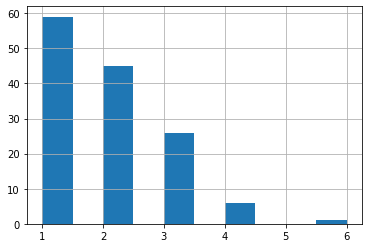

In [227]:
#number of containers that he/she ordered in a single day
user_out.groupby(by=user_out["OwnerSince"].dt.date).size().hist()#sort_values(ascending=False)

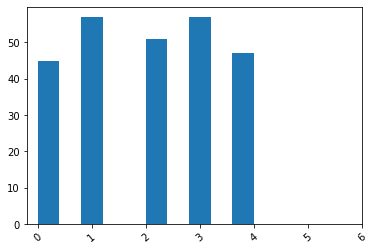

In [228]:
# weekday distribution
plt.hist(user_out['OwnerSince'].dt.weekday) # convert to hours
plt.xticks(np.arange(7), rotation=40)


plt.show()

In [229]:
# To which stores does he/she associate?
user_in['StoreId'].unique()

array(['2470883c-e064-43a6-8844-1f8be7b2ff81'], dtype=object)

In [230]:
user_out['StoreId'].unique()

array(['2470883c-e064-43a6-8844-1f8be7b2ff81'], dtype=object)

## Time Series 

In [231]:

ops_user=user_out.groupby(by=user_out['OwnerSince'].dt.date).size().to_frame('count')

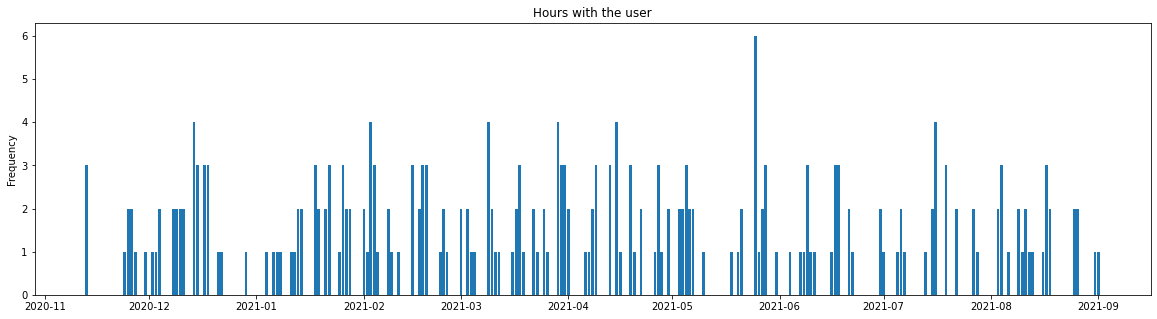

In [232]:
plt.figure(figsize=(20,5))
plt.title('Hours with the user')
plt.ylabel('Frequency')

plt.bar(ops_user.index, ops_user['count']) # convert to hours
plt.show()

In [233]:

# prepare expected column names
#sales_day.columns = ['ds', 'y']

ops_user['y']= ops_user['count']
ops_user['ds']= pd.Series()
ops_user['ds']=pd.to_datetime(ops_user.index)
# create test dataset, remove last 14 days
train = ops_user.drop(ops_user.index[-28:])

print(train.tail())

            count  y         ds
OwnerSince                     
2021-06-11      1  1 2021-06-11
2021-06-16      1  1 2021-06-16
2021-06-17      3  3 2021-06-17
2021-06-18      3  3 2021-06-18
2021-06-21      2  2 2021-06-21


/Users/kultiginbozdemir/opt/anaconda3/envs/CO2/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


MAE: 0.663


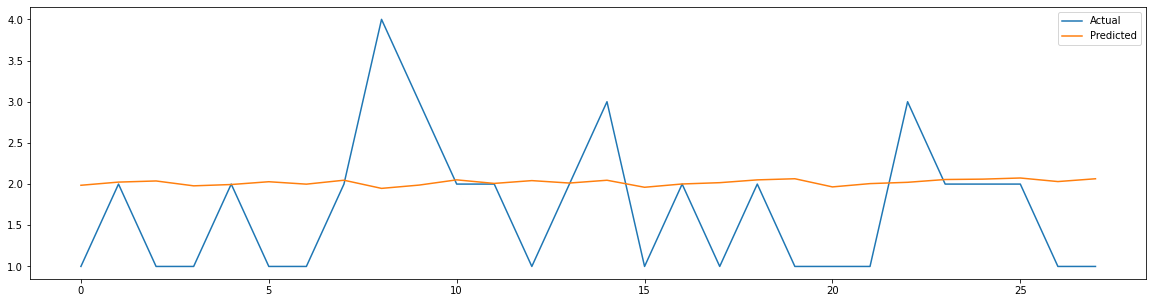

In [234]:

# define the model
model = Prophet(weekly_seasonality=False,daily_seasonality=False 
               ).add_country_holidays(country_name='DE'
                ).add_seasonality(name="Weekly", period=7,fourier_order=50)
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
future=list(ops_user.loc[ops_user.index[-28:],].index)
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = ops_user['y'][-28:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.figure(figsize=(20, 5))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

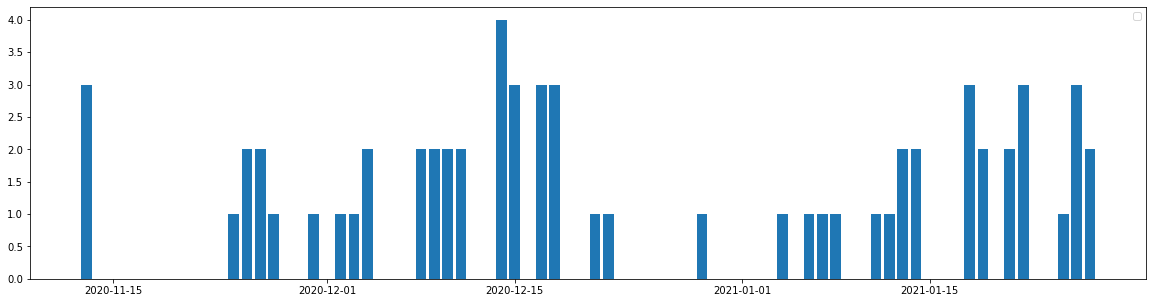

In [243]:
plt.figure(figsize=(20, 5))
plt.bar(ops_user['count'].head(35).index, ops_user['count'].head(35).values)

plt.legend()
plt.show()

Autocorrelation, or partial autocorrelation <br>
Granger casuality test to predit the return times from chekc-out times <br>